In [1]:
# --- Standard imports ---
import os, sys
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from scipy.stats import boxcox, skew, kurtosis
import seaborn as sns

from config_local import local_config  # provides TRAIN_CSV, TEST_CSV, SUBMISSIONS_DIR

In [2]:
train = pd.read_csv(local_config.TRAIN_PROCESS1_CSV)   # e.g. data/train_filled.csv         
test = pd.read_csv(local_config.TEST_PROCESS1_CSV)    # e.g. data/test_filled.csv

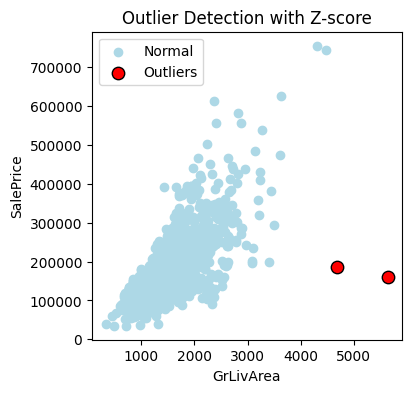

In [4]:
# Compute z-scores
z_scores = np.abs(stats.zscore(train["GrLivArea"]))
outlier_mask = (train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000)#z_scores > 3  # mark outliers

# Plot all points in blue
plt.figure(figsize=(4,4))
plt.scatter(train["GrLivArea"], train["SalePrice"], c="lightblue", label="Normal")

# Overlay outliers in red
plt.scatter(train.loc[outlier_mask, "GrLivArea"], 
            train.loc[outlier_mask, "SalePrice"], 
            c="red", edgecolor="black", s=80, label="Outliers")

# plt.plot([4000, 4000], [0, 200000], color="red", linestyle="--", linewidth=2)
# plt.plot([4000, train["GrLivArea"].max()], [200000, 200000], color="red", linestyle="--", linewidth=2)

plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.legend()
plt.title("Outlier Detection with Z-score")
plt.show()

In [5]:
# # Drop rows where GrLivArea is very high and SalePrice is low
outlier_mask = (train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000)
train = train.loc[~outlier_mask]

In [6]:
train.to_csv(__import__("pathlib").Path(local_config.TRAIN_PROCESS2_CSV).resolve().parent / "train_process2.csv", index=False)
test.to_csv(__import__("pathlib").Path(local_config.TEST_PROCESS2_CSV).resolve().parent / "test_process2.csv", index=False)